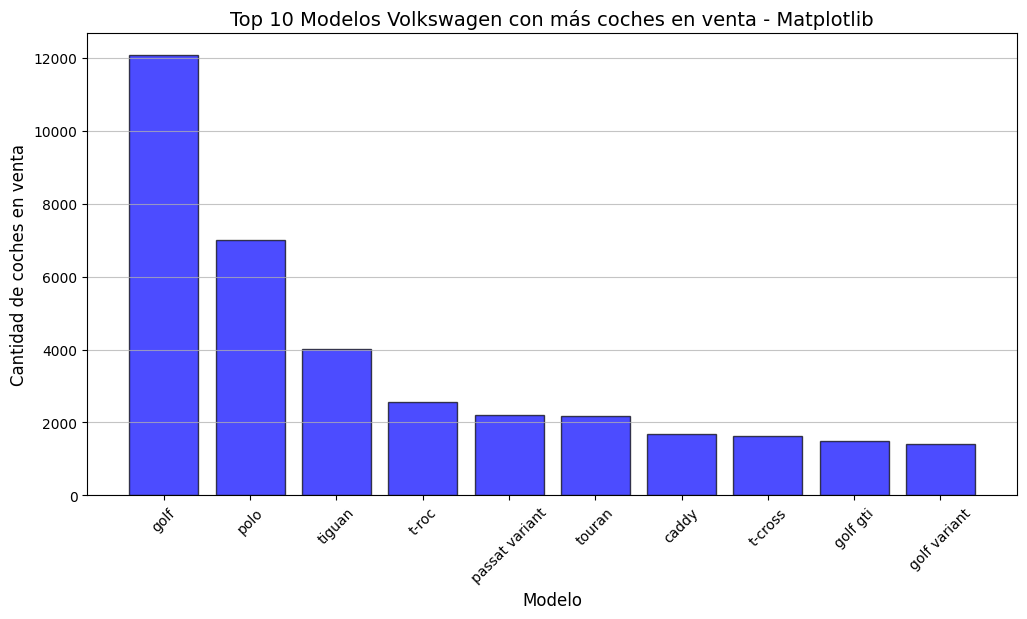

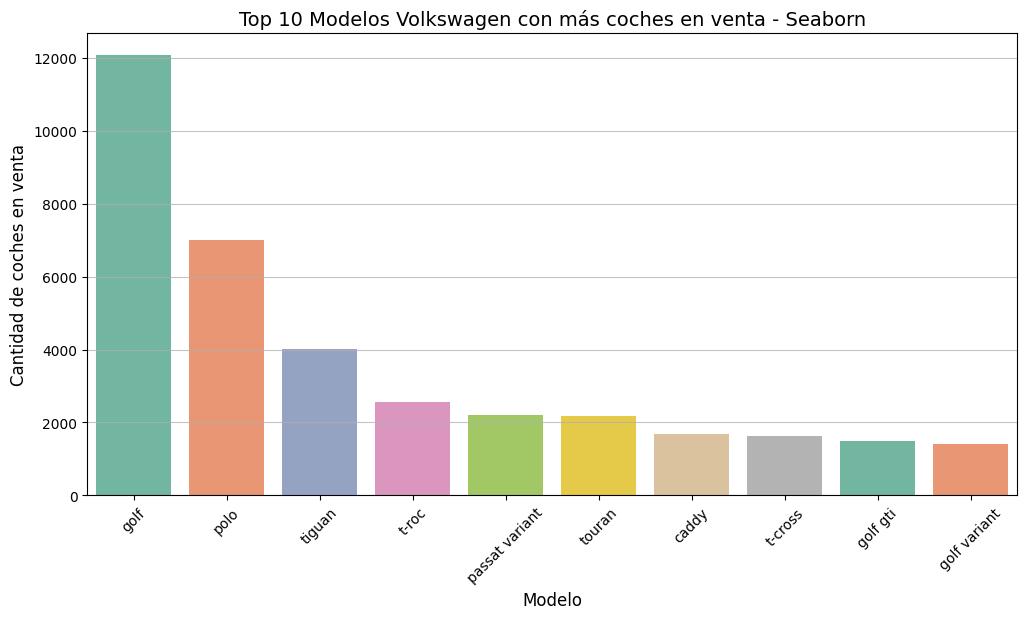

In [4]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = '202412_CochesLimpio.csv'
data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Filtrar los datos para la marca Volkswagen
volkswagen_data = data.loc[data['Marca'].str.contains('volkswagen', case=False, na=False)].copy()

# Agrupar por modelo y contar el número total de coches en venta
model_counts = volkswagen_data['Modelo'].value_counts().nlargest(10)

# Convertir los datos a un DataFrame para facilitar el uso en las tres librerías
model_counts_df = model_counts.reset_index()
model_counts_df.columns = ['Modelo', 'Cantidad']

# --------------------------
# Diagrama de barras con Matplotlib
# --------------------------
plt.figure(figsize=(12, 6))
plt.bar(model_counts_df['Modelo'], model_counts_df['Cantidad'], color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Cantidad de coches en venta', fontsize=12)
plt.title('Top 10 Modelos Volkswagen con más coches en venta - Matplotlib', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

# --------------------------
# Diagrama de barras con Seaborn (corregido)
# --------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=model_counts_df, 
    x='Modelo', 
    y='Cantidad', 
    palette='Set2', 
    hue='Modelo', 
    dodge=False, 
    legend=False  # Desactivamos la leyenda si no es necesaria
)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Cantidad de coches en venta', fontsize=12)
plt.title('Top 10 Modelos Volkswagen con más coches en venta - Seaborn', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


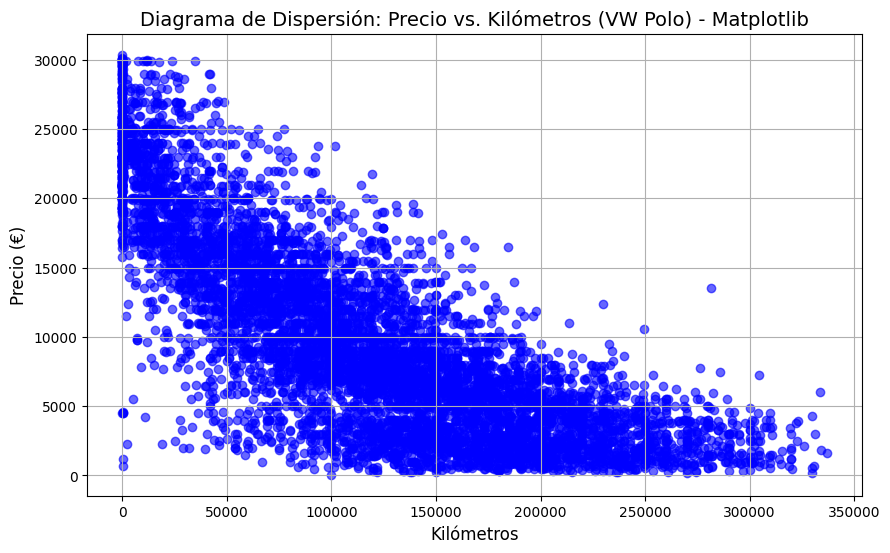

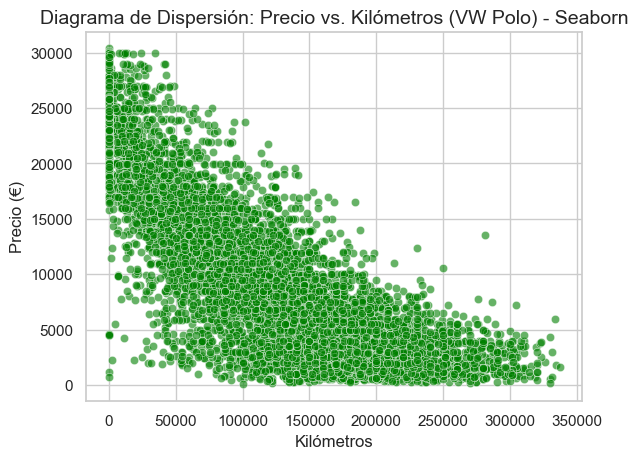

In [5]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = '202412_CochesLimpio.csv'
data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Filtrar los datos para la marca "Volkswagen Polo"
volkswagen_polo_data = data.loc[
    (data['Marca'].str.contains('volkswagen', case=False, na=False)) &
    (data['Modelo'].str.contains('polo', case=False, na=False))
].copy()  # Usar `.copy()` asegura que trabajamos con una copia independiente

# Convertir columnas relevantes a valores numéricos, eliminando caracteres no deseados
volkswagen_polo_data['Precio'] = volkswagen_polo_data['Precio'].replace('[^0-9]', '', regex=True).astype(float)
volkswagen_polo_data['Kilometros'] = volkswagen_polo_data['Kilometros'].replace('[^0-9]', '', regex=True).astype(float)

# --------------------------
# Filtrar valores atípicos
# --------------------------
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1                  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR   # Límite inferior
    upper_bound = Q3 + 1.5 * IQR   # Límite superior
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

# Aplicar el filtrado para las columnas de interés
volkswagen_polo_data = remove_outliers(volkswagen_polo_data, 'Precio')
volkswagen_polo_data = remove_outliers(volkswagen_polo_data, 'Kilometros')

# --------------------------
# Diagrama de dispersión con Matplotlib
# --------------------------
plt.figure(figsize=(10, 6))
plt.scatter(volkswagen_polo_data['Kilometros'], volkswagen_polo_data['Precio'], alpha=0.6, color='blue')
plt.xlabel('Kilómetros', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Diagrama de Dispersión: Precio vs. Kilómetros (VW Polo) - Matplotlib', fontsize=14)
plt.grid(True)
plt.show()

# --------------------------
# Diagrama de dispersión con Seaborn
# --------------------------
sns.set(style="whitegrid")  # Estilo visual de Seaborn
scatter_plot = sns.scatterplot(data=volkswagen_polo_data, x='Kilometros', y='Precio', alpha=0.6, color='green')

# Ajustar detalles con Matplotlib
scatter_plot.set_title('Diagrama de Dispersión: Precio vs. Kilómetros (VW Polo) - Seaborn', fontsize=14)
scatter_plot.set_xlabel('Kilómetros', fontsize=12)
scatter_plot.set_ylabel('Precio (€)', fontsize=12)

# Mostrar el gráfico
plt.show()


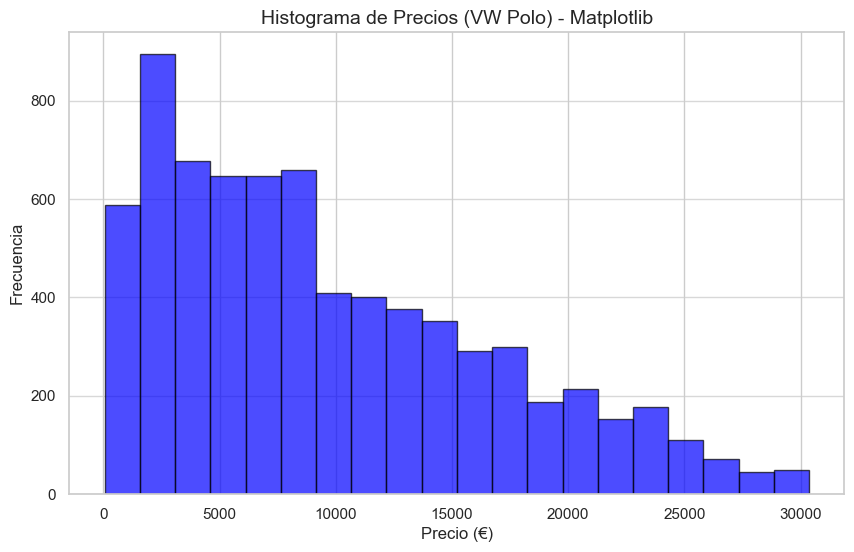

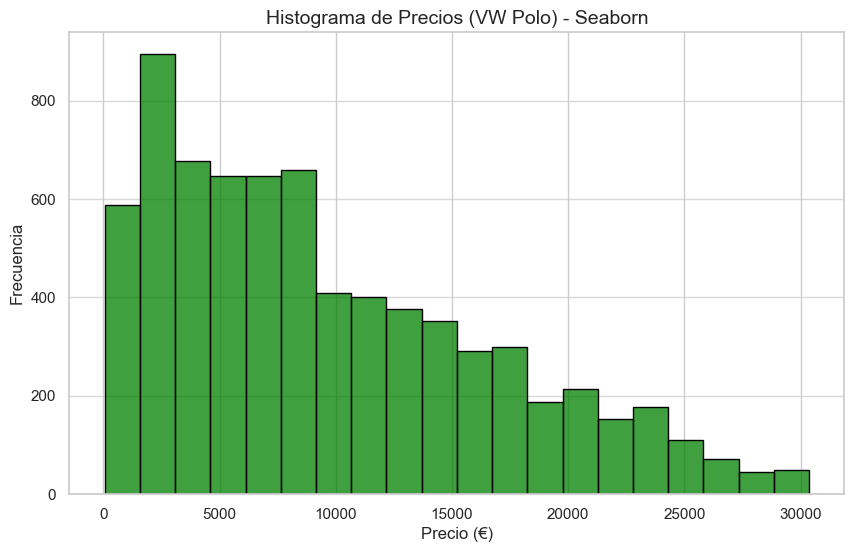

In [6]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = '202412_CochesLimpio.csv'
data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Filtrar los datos para la marca "Volkswagen Polo"
volkswagen_polo_data = data.loc[
    (data['Marca'].str.contains('volkswagen', case=False, na=False)) &
    (data['Modelo'].str.contains('polo', case=False, na=False))
].copy()  # Usar `.copy()` para trabajar con una copia independiente

# Convertir la columna "Precio" a valores numéricos, eliminando caracteres no deseados
volkswagen_polo_data['Precio'] = volkswagen_polo_data['Precio'].replace('[^0-9]', '', regex=True).astype(float)

# --------------------------
# Filtrar valores atípicos en "Precio"
# --------------------------
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1                  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR   # Límite inferior
    upper_bound = Q3 + 1.5 * IQR   # Límite superior
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

# Aplicar el filtrado para la columna "Precio"
volkswagen_polo_data = remove_outliers(volkswagen_polo_data, 'Precio')

# --------------------------
# Histograma con Matplotlib
# --------------------------
plt.figure(figsize=(10, 6))
plt.hist(volkswagen_polo_data['Precio'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma de Precios (VW Polo) - Matplotlib', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

# --------------------------
# Histograma con Seaborn
# --------------------------
plt.figure(figsize=(10, 6))
sns.histplot(volkswagen_polo_data['Precio'], bins=20, kde=False, color='green', edgecolor='black')
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma de Precios (VW Polo) - Seaborn', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

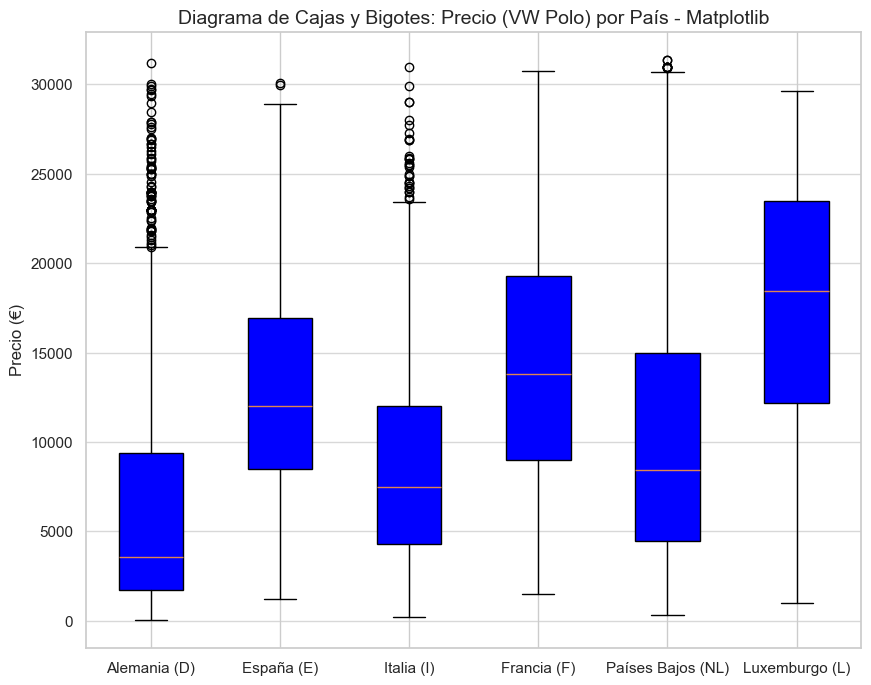

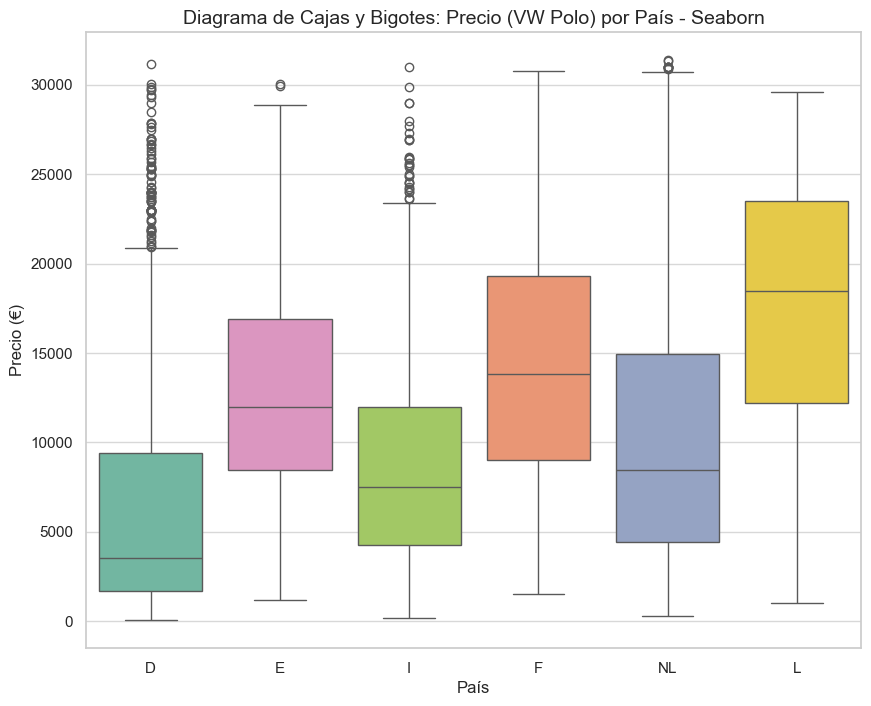

In [7]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = '202412_CochesLimpio.csv'
data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Filtrar los datos para la marca "Volkswagen Polo"
volkswagen_polo_data = data.loc[
    (data['Marca'].str.contains('volkswagen', case=False, na=False)) &
    (data['Modelo'].str.contains('polo', case=False, na=False)) &
    (data['Pais'].isin(['D', 'E', 'I', 'F', 'NL', 'L']))
].copy()  # Usar `.copy()` para trabajar con una copia independiente

# Convertir la columna "Precio" a valores numéricos, eliminando caracteres no deseados
volkswagen_polo_data['Precio'] = volkswagen_polo_data['Precio'].replace('[^0-9]', '', regex=True).astype(float)

# --------------------------
# Filtrar valores atípicos en "Precio"
# --------------------------
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1                  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR   # Límite inferior
    upper_bound = Q3 + 1.5 * IQR   # Límite superior
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

# Aplicar el filtrado para la columna "Precio"
volkswagen_polo_data = remove_outliers(volkswagen_polo_data, 'Precio')

# --------------------------
# Diagrama de cajas y bigotes con Matplotlib
# --------------------------
plt.figure(figsize=(10, 8))
plt.boxplot(
    [volkswagen_polo_data.loc[volkswagen_polo_data['Pais'] == p, 'Precio'] for p in ['D', 'E', 'I', 'F', 'NL', 'L']],
    tick_labels=['Alemania (D)', 'España (E)', 'Italia (I)', 'Francia (F)', 'Países Bajos (NL)', 'Luxemburgo (L)'],
    patch_artist=True, boxprops=dict(facecolor='blue', color='black')
)
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Diagrama de Cajas y Bigotes: Precio (VW Polo) por País - Matplotlib', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

# --------------------------
# Diagrama de cajas y bigotes con Seaborn
# --------------------------
plt.figure(figsize=(10, 8))
sns.boxplot(data=volkswagen_polo_data, x='Pais', y='Precio', hue='Pais',
            order=['D', 'E', 'I', 'F', 'NL', 'L'], palette='Set2', dodge=False, legend=False)
plt.xlabel('País', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Diagrama de Cajas y Bigotes: Precio (VW Polo) por País - Seaborn', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


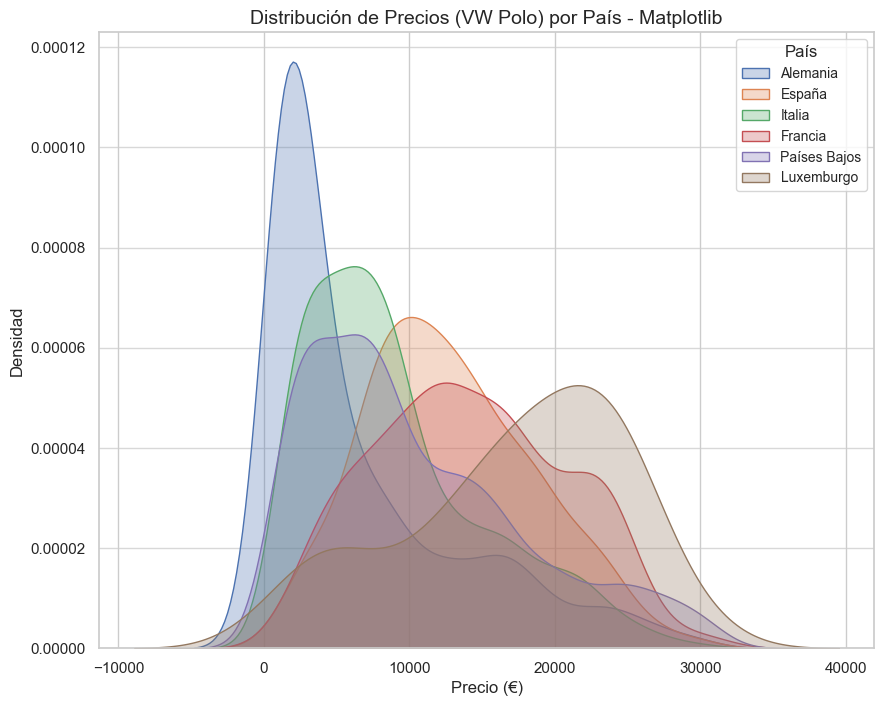

/var/folders/qc/0mqfstj13hv7ktr1mxg1s_dc0000gn/T/ipykernel_12907/3686152087.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='País', fontsize=10)


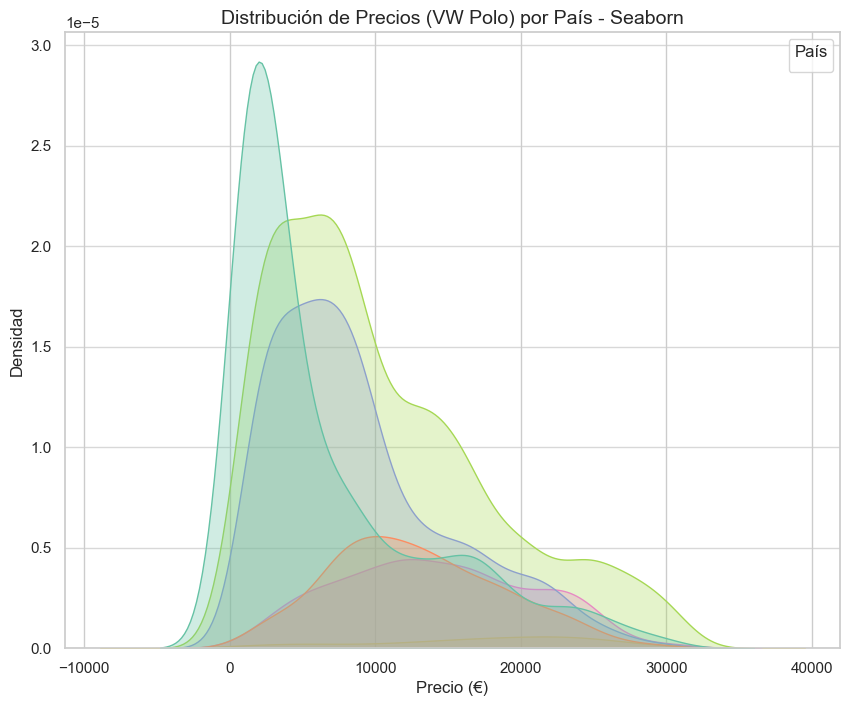

In [8]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = '202412_CochesLimpio.csv'
data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Filtrar los datos para la marca "Volkswagen Polo"
volkswagen_polo_data = data.loc[
    (data['Marca'].str.contains('volkswagen', case=False, na=False)) &
    (data['Modelo'].str.contains('polo', case=False, na=False)) &
    (data['Pais'].isin(['D', 'E', 'I', 'F', 'NL', 'L']))
].copy()  # Usar `.copy()` para trabajar con una copia independiente

# Convertir la columna "Precio" a valores numéricos, eliminando caracteres no deseados
volkswagen_polo_data['Precio'] = volkswagen_polo_data['Precio'].replace('[^0-9]', '', regex=True).astype(float)

# --------------------------
# Filtrar valores atípicos en "Precio"
# --------------------------
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1                  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR   # Límite inferior
    upper_bound = Q3 + 1.5 * IQR   # Límite superior
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

# Aplicar el filtrado para la columna "Precio"
volkswagen_polo_data = remove_outliers(volkswagen_polo_data, 'Precio')

# --------------------------
# Diagrama de distribución con Matplotlib
# --------------------------
plt.figure(figsize=(10, 8))
for country, label in zip(['D', 'E', 'I', 'F', 'NL', 'L'], ['Alemania', 'España', 'Italia', 'Francia', 'Países Bajos', 'Luxemburgo']):
    subset = volkswagen_polo_data[volkswagen_polo_data['Pais'] == country]['Precio']
    sns.kdeplot(subset, label=label, fill=True, alpha=0.3)  # Usamos `label` directamente aquí
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.title('Distribución de Precios (VW Polo) por País - Matplotlib', fontsize=14)
plt.legend(title='País', fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.show()

# --------------------------
# Diagrama de distribución con Seaborn
# --------------------------
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=volkswagen_polo_data, 
    x='Precio', 
    hue='Pais', 
    fill=True, 
    alpha=0.3, 
    hue_order=['D', 'E', 'I', 'F', 'NL', 'L'], 
    palette='Set2'
)
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.title('Distribución de Precios (VW Polo) por País - Seaborn', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.legend(title='País', fontsize=10)
plt.show()

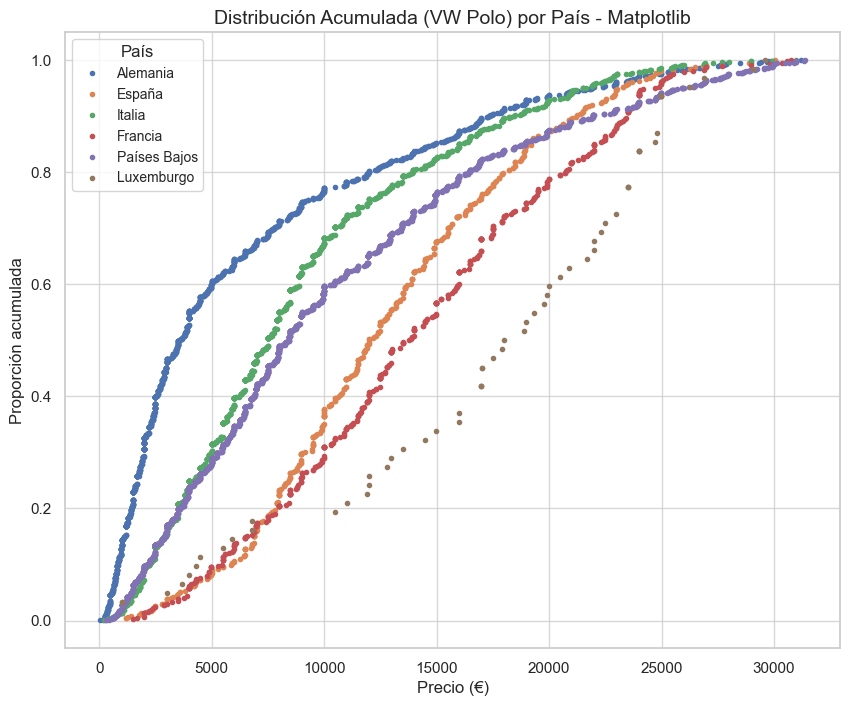

/var/folders/qc/0mqfstj13hv7ktr1mxg1s_dc0000gn/T/ipykernel_12907/3666644838.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='País', fontsize=10)


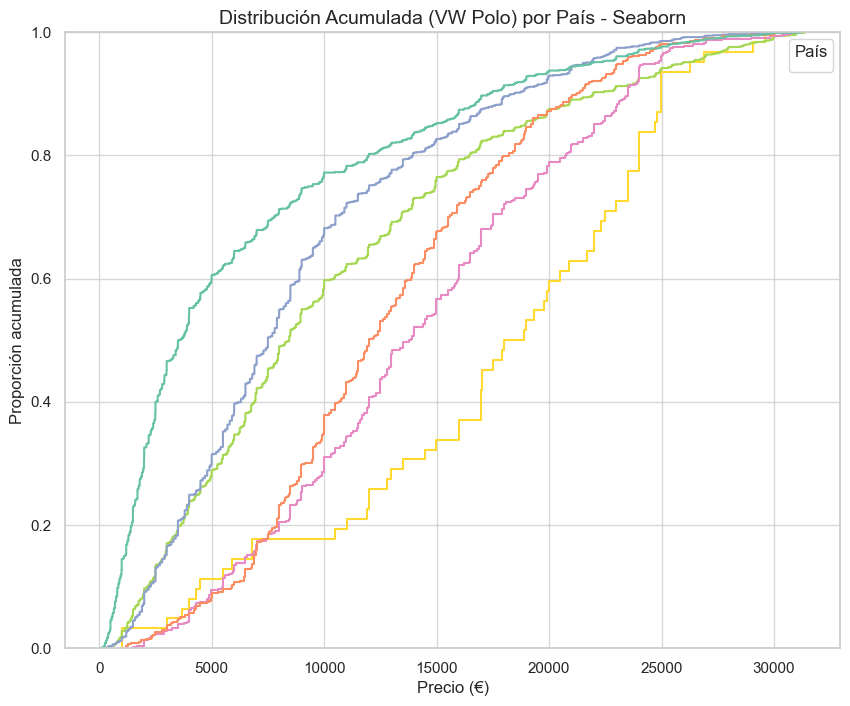

In [9]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = '202412_CochesLimpio.csv'
data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Filtrar los datos para la marca "Volkswagen Polo"
volkswagen_polo_data = data.loc[
    (data['Marca'].str.contains('volkswagen', case=False, na=False)) &
    (data['Modelo'].str.contains('polo', case=False, na=False)) &
    (data['Pais'].isin(['D', 'E', 'I', 'F', 'NL', 'L']))
].copy()  # Usar `.copy()` para trabajar con una copia independiente

# Convertir la columna "Precio" a valores numéricos, eliminando caracteres no deseados
volkswagen_polo_data['Precio'] = volkswagen_polo_data['Precio'].replace('[^0-9]', '', regex=True).astype(float)

# --------------------------
# Filtrar valores atípicos en "Precio"
# --------------------------
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1                  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR   # Límite inferior
    upper_bound = Q3 + 1.5 * IQR   # Límite superior
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

# Aplicar el filtrado para la columna "Precio"
volkswagen_polo_data = remove_outliers(volkswagen_polo_data, 'Precio')

# --------------------------
# Diagrama de distribución acumulada con Matplotlib
# --------------------------
plt.figure(figsize=(10, 8))
for country, label in zip(['D', 'E', 'I', 'F', 'NL', 'L'], ['Alemania', 'España', 'Italia', 'Francia', 'Países Bajos', 'Luxemburgo']):
    subset = volkswagen_polo_data[volkswagen_polo_data['Pais'] == country]['Precio'].sort_values()
    ecdf_y = subset.rank(method='max') / len(subset)
    plt.plot(subset, ecdf_y, marker='.', linestyle='none', label=label)
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Proporción acumulada', fontsize=12)
plt.title('Distribución Acumulada (VW Polo) por País - Matplotlib', fontsize=14)
plt.legend(title='País', fontsize=10)
plt.grid(alpha=0.75)
plt.show()

# --------------------------
# Diagrama de distribución acumulada con Seaborn
# --------------------------
plt.figure(figsize=(10, 8))
sns.ecdfplot(data=volkswagen_polo_data, x='Precio', hue='Pais', 
             hue_order=['D', 'E', 'I', 'F', 'NL', 'L'], palette='Set2')
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Proporción acumulada', fontsize=12)
plt.title('Distribución Acumulada (VW Polo) por País - Seaborn', fontsize=14)
plt.grid(alpha=0.75)
plt.legend(title='País', fontsize=10)
plt.show()
